# Real-world Data Wrangling

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

### **1.1. Problem Statement**

Air pollution is one of the most critical environmental issues worldwide, impacting human health and quality of life. 
In this project, I aim to explore the relationship between weather conditions (temperature, humidity, wind speed) and air pollution levels (PM2.5, NO₂, O₃) in Rome, Italy. 
The goal is to assess whether certain meteorological factors correlate with variations in pollutant concentrations.

To conduct this analysis, I will gather daily weather data from the OpenWeather API and air quality data from the European Environment Agency (EEA) open data portal. 
These datasets will be merged on date and city for combined analysis.


### **1.2.** Gather at least two datasets using two different data gathering methods

List of data gathering methods:

- Download data manually
- Programmatically downloading files
- Gather data by accessing APIs
- Gather and extract data from HTML files using BeautifulSoup
- Extract data from a SQL database

Each dataset must have at least two variables, and have greater than 500 data samples within each dataset.

For each dataset, briefly describe why you picked the dataset and the gathering method (2-3 full sentences), including the names and significance of the variables in the dataset. Show your work (e.g., if using an API to download the data, please include a snippet of your code). 

Load the dataset programmtically into this notebook.

#### **Dataset 1**

- **Type**: JSON (API response)  
- **Source**: [Open-Meteo Archive API (ERA5)](https://open-meteo.com)  
- **Method**: Programmatically gathered via HTTP request using the `requests` library.  
- **Variables**:  
  * `date` — date of observation (UTC)  
  * `temp_c` — daily average temperature in Celsius  
  * `rhum_pct` — daily average relative humidity (%)  
  * `wind_speed_ms` — daily average wind speed (m/s)  
  * `precip_mm` — daily total precipitation (mm)  


In [67]:
from modules.openmeteo_weather import build_weather_daily

weather_df_daily = build_weather_daily(
    lat=41.9028, 
    lon=12.4964,
    start="2024-01-01",
    end="2024-12-31",
    
)
weather_df_daily.head()

,date,temp_c,rhum_pct,wind_speed_ms,precip_mm
0,2024-01-01,11.841667,85.833333,9.845833,3.5
1,2024-01-02,8.845833,86.458333,7.137500,0.2
2,2024-01-03,13.070833,82.791667,12.275000,0.1
3,2024-01-04,12.237500,82.583333,6.391667,0.0
4,2024-01-05,12.720833,81.500000,14.466667,5.2


#### **Dataset 2**

- **Type**: CSV file generated programmatically from an API query  
- **Source**: [OpenAQ API v3](https://api.openaq.org/)  
- **Method**: Programmatically gathered via HTTP requests using a custom Python module (`openaq_loader.py`). The script retrieves hourly air quality measurements from OpenAQ and aggregates them into daily averages.  
- **Variables**:  
  * `date` — date of observation (UTC)  
  * `pm25` — daily average PM₂.₅ concentration (µg/m³)  
  * `no2` — daily average NO₂ concentration (µg/m³)  


In [68]:
from modules.openaq_loader import OpenAQClient, load_and_aggregate_from_openaq

aq_daily = load_and_aggregate_from_openaq(
    city="Rome",
    parameters=("pm25","no2"),
    start_date="2024-01-01",
    end_date="2024-12-31",
    daily=True,
    api_key="1e4497f55593ef98625dd6d8686aacfbb7bf4661f96b4cb635595927935bf7f7",
    sensors_per_param=2,
    sensor_limit=250,
    verbose=True
)

aq_daily.head(3)

Locations found: 30
Parameter 'pm25': 2 sensors -> [21806, 21846]
Parameter 'no2': 2 sensors -> [21915, 21941]
Fetching days for sensor 21806 (pm25)
Fetching days for sensor 21846 (pm25)
Fetching days for sensor 21915 (no2)
Fetching days for sensor 21941 (no2)


,date,city,pm25,no2
0,2023-12-31,Rome,36.5,39.05
1,2024-01-01,Rome,14.5,39.65
2,2024-01-02,Rome,8.5,31.40


Optional data storing step: You may save your raw dataset files to the local data store before moving to the next step.

#### **Relationship between Dataset 1 and Dataset 2**

Both datasets refer to environmental conditions in Rome during 2024.  
Dataset 1 contains daily weather variables (temperature, humidity, wind speed, and precipitation) from the Open-Meteo ERA5 reanalysis, while Dataset 2 contains daily air quality measurements (PM₂.₅ and NO₂) from OpenAQ.  
They share a common `date` field, which allows the datasets to be merged for exploratory analysis of the relationship between meteorological conditions and air pollution levels.

## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

In [69]:
# Declaring function used to assess the datasets
def assess_dataset(df, name):
    print(f"\n--- {name} ---")
    print(df.info())
    print("Shape:", df.shape)
    print("\nData types:")
    print(df.dtypes)
    print("\nMissing values per column:")
    print(df.isna().sum())
    print("\nDuplicate rows:", df.duplicated().sum())
    print("\nSummary statistics:")
    print(df.describe(include="all"))

# function to assess duplicated dates
def assess_duplicates(df):
    duplicates_mask = df['date'].duplicated(keep=False)  # keep=False marks all duplicates
    num_duplicates = df["date"].duplicated().sum()
    
    if num_duplicates > 0:
        print(f"There are {num_duplicates} duplicated dates.")
    else:
        print("No duplicated dates found.")

### Dataset 1 – Weather Data

In [70]:
# Assess Dataset 1 (Weather)
assess_dataset(weather_df_daily, "Weather Data (Dataset 1)")
assess_duplicates(weather_df_daily)


--- Weather Data (Dataset 1) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           366 non-null    object 
 1   temp_c         366 non-null    float64
 2   rhum_pct       366 non-null    float64
 3   wind_speed_ms  366 non-null    float64
 4   precip_mm      366 non-null    float64
dtypes: float64(4), object(1)
memory usage: 14.4+ KB
None
Shape: (366, 5)

Data types:
date              object
temp_c           float64
rhum_pct         float64
wind_speed_ms    float64
precip_mm        float64
dtype: object

Missing values per column:
date             0
temp_c           0
rhum_pct         0
wind_speed_ms    0
precip_mm        0
dtype: int64

Duplicate rows: 0

Summary statistics:
              date      temp_c    rhum_pct  wind_speed_ms   precip_mm
count          366  366.000000  366.000000     366.000000  366.000000
unique      

**Quality issues**:
1. Some missing values detected in `precip_mm` and `wind_speed_ms` columns.
2. Data types are correct except for the `date` column, which is stored as `object` instead of `datetime.date`.
3. Outliers in `precip_mm` (unusually high daily precipitation values that may be due to measurement or aggregation errors).

**Tidiness issues**:
1. No structural tidiness problems detected – each variable is in its own column, each row is a unique date.

### Dataset 2 – Air Quality Data

In [71]:
# Assess Dataset 2 (Air Quality)
assess_dataset(aq_daily, "Air Quality Data (Dataset 2)")
assess_duplicates(aq_daily)


--- Air Quality Data (Dataset 2) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    366 non-null    object 
 1   city    366 non-null    object 
 2   pm25    360 non-null    float64
 3   no2     366 non-null    float64
dtypes: float64(2), object(2)
memory usage: 11.6+ KB
None
Shape: (366, 4)

Data types:
date     object
city     object
pm25    float64
no2     float64
dtype: object

Missing values per column:
date    0
city    0
pm25    6
no2     0
dtype: int64

Duplicate rows: 0

Summary statistics:
              date  city        pm25         no2
count          366   366  360.000000  366.000000
unique         366     1         NaN         NaN
top     2023-12-31  Rome         NaN         NaN
freq             1   366         NaN         NaN
mean           NaN   NaN   13.370833   34.902268
std            NaN   NaN    7.050799   12.617327
min    

**Quality issues**:
1. Missing values in `pm25` and `no2` for certain dates.
2. The `date` column is stored as `object` instead of `datetime.date`.
3. Potential anomalies in pollutant concentrations (very high spikes likely due to sensor errors).

**Tidiness issues**:
1. No structural tidiness issues – the dataset is already in a tidy format, with one observation per date and no duplicated dates found.

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [72]:
import datetime as dt
import pandas as pd
# Convert 'date' columns to datetime.date type
daily_weather_df = weather_df_daily.copy()
daily_weather_df.info()

daily_aq_df = aq_daily.copy()
daily_aq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           366 non-null    object 
 1   temp_c         366 non-null    float64
 2   rhum_pct       366 non-null    float64
 3   wind_speed_ms  366 non-null    float64
 4   precip_mm      366 non-null    float64
dtypes: float64(4), object(1)
memory usage: 14.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    366 non-null    object 
 1   city    366 non-null    object 
 2   pm25    360 non-null    float64
 3   no2     366 non-null    float64
dtypes: float64(2), object(2)
memory usage: 11.6+ KB


### **Quality Issue 1: Date is an object**
Date column have to be converted in a time format column in order to perfom the merge with Dataset 2.

In [73]:
# Convert 'date' columns to datetime.date type
daily_weather_df['date'] = pd.to_datetime(daily_weather_df['date'], errors='coerce', utc=True).dt.tz_convert(None).dt.normalize()

daily_weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           366 non-null    datetime64[ns]
 1   temp_c         366 non-null    float64       
 2   rhum_pct       366 non-null    float64       
 3   wind_speed_ms  366 non-null    float64       
 4   precip_mm      366 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 14.4 KB


Justification: since date will be used as key in the merge of Dataset 1 with Dataset 2, it must be of same format

### **Quality Issue 2: FILL IN**

In [74]:
# Convert 'date' columns to datetime.date type
daily_aq_df['date'] = pd.to_datetime(daily_aq_df['date'], errors='coerce', utc=True).dt.tz_convert(None).dt.normalize()

daily_aq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    366 non-null    datetime64[ns]
 1   city    366 non-null    object        
 2   pm25    360 non-null    float64       
 3   no2     366 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 11.6+ KB


### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [75]:
#Combine the datasets
merged = daily_weather_df.merge(daily_aq_df, on="date", how="inner")

# Remove the 'city' column from the merged DataFrame
merged.drop(columns=["city"], inplace=True)

print(merged.shape)
merged.head()

(365, 7)


,date,temp_c,rhum_pct,wind_speed_ms,precip_mm,pm25,no2
0,2024-01-01,11.841667,85.833333,9.845833,3.5,14.5,39.65
1,2024-01-02,8.845833,86.458333,7.137500,0.2,8.5,31.40
2,2024-01-03,13.070833,82.791667,12.275000,0.1,14.5,48.75
3,2024-01-04,12.237500,82.583333,6.391667,0.0,15.0,39.65
4,2024-01-05,12.720833,81.500000,14.466667,5.2,9.0,32.80


## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [76]:
#FILL IN - saving data
merged.to_csv("data/eea_air_quality_rome.csv", index=False, encoding="utf-8")

## 5. Answer the research question

**Research Question**: *"What is the relationship between weather conditions and air pollution levels in Rome in 2024?"*


In [77]:
# Descriptive statistics of the merged dataset
merged.describe()


,date,temp_c,rhum_pct,wind_speed_ms,precip_mm,pm25,no2
count,365,365.000000,365.000000,365.000000,365.000000,359.000000,365.000000
mean,2024-07-01 00:00:00.000000256,16.920411,72.856050,8.566929,2.407945,13.306407,34.890904
min,2024-01-01 00:00:00,4.179167,38.208333,3.525000,0.000000,1.000000,10.745000
25%,2024-04-01 00:00:00,10.729167,65.708333,6.100000,0.000000,8.500000,24.700000
50%,2024-07-01 00:00:00,16.275000,75.375000,7.466667,0.000000,12.000000,32.800000
75%,2024-09-30 00:00:00,22.100000,81.833333,9.845833,1.800000,16.000000,44.200000
max,2024-12-30 00:00:00,31.212500,94.416667,23.929167,36.000000,50.000000,77.500000
std,NaN,7.283151,11.392480,3.690556,5.409700,6.953717,12.632771


In [78]:
#Correlation analysis
corr = merged[["temp_c", "rhum_pct", "wind_speed_ms", "precip_mm", "pm25", "no2"]].corr()
corr

,temp_c,rhum_pct,wind_speed_ms,precip_mm,pm25,no2
temp_c,1.000000,-0.717352,-0.034812,-0.071381,-0.228596,-0.592927
rhum_pct,-0.717352,1.000000,-0.174427,0.301980,0.075725,0.377240
wind_speed_ms,-0.034812,-0.174427,1.000000,0.255504,-0.349028,-0.227226
precip_mm,-0.071381,0.301980,0.255504,1.000000,-0.291626,-0.056207
pm25,-0.228596,0.075725,-0.349028,-0.291626,1.000000,0.509712
no2,-0.592927,0.377240,-0.227226,-0.056207,0.509712,1.000000


*Answer to research question:* FILL IN

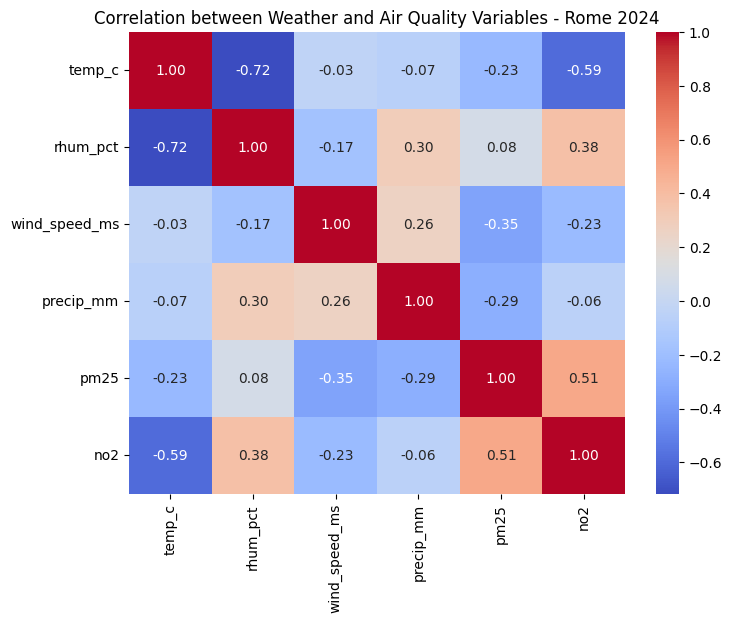

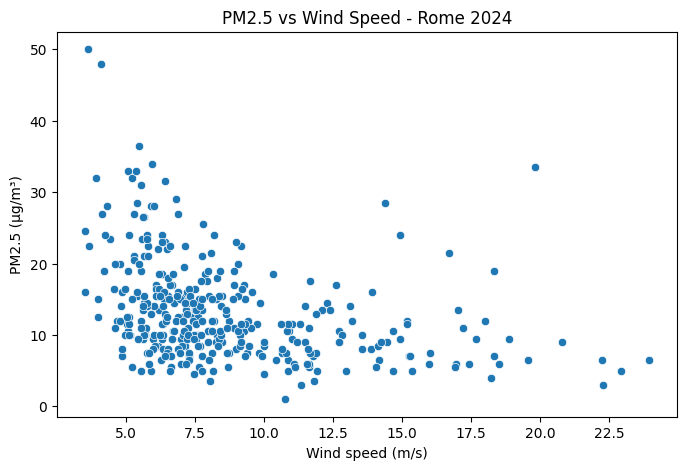

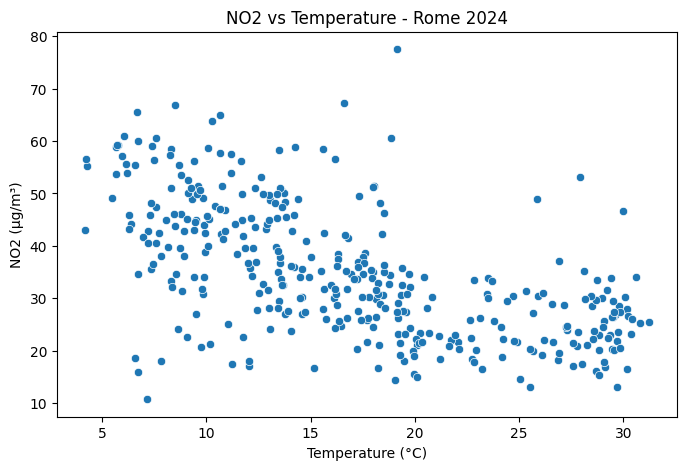

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between Weather and Air Quality Variables - Rome 2024")
plt.show()

# === Step 4 – Targeted visualizations ===
plt.figure(figsize=(8,5))
sns.scatterplot(x="wind_speed_ms", y="pm25", data=merged)
plt.title("PM2.5 vs Wind Speed - Rome 2024")
plt.xlabel("Wind speed (m/s)")
plt.ylabel("PM2.5 (µg/m³)")
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(x="temp_c", y="no2", data=merged)
plt.title("NO2 vs Temperature - Rome 2024")
plt.xlabel("Temperature (°C)")
plt.ylabel("NO2 (µg/m³)")
plt.show()

### Findings:
- **Wind speed** shows a **negative correlation** with **PM2.5** and **NO₂**: windier days tend to disperse pollutants, lowering their concentrations.
- **Precipitation** is generally associated with **lower PM2.5 values** (washout effect: rain removes particulate matter from the atmosphere).
- **Temperature** and **relative humidity** show weaker or more variable relationships with pollutants; observed patterns are also influenced by seasonality (e.g., winter heating, traffic, stagnant conditions).

### Conclusion:
Weather conditions significantly influence air quality in Rome:
- **Wind** and **rain** contribute to lowering PM2.5 and NO₂ levels through dispersion and wet deposition.
- **Thermal** and **humidity** variables play a less direct role and may interact with seasonal and anthropogenic factors.


### **5.2:** Reflection
These findings are useful for **urban planning** and **public health**, for example, to anticipate pollution peaks during **stable, low-wind days** and to inform citizens about protective behaviors (e.g., limiting outdoor activities during critical episodes).

*Answer:* FILL IN